In [204]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import splrep,splev

In [241]:
start=date(2021,12,2)
series_code = ['THREEFF1', 'THREEFF5','THREEFF10']
data=DataReader(series_code,"fred",start).dropna(axis=0)
pd.DataFrame(data)
data_meaned = data - np.mean(data , axis = 0)

In [257]:
data_meaned.columns=[0,1,2]
data_meaned

,0,1,2
DATE,,,
2021-12-02,-0.195694,-0.041216,0.030406
2021-12-03,-0.209294,-0.124116,-0.059294
2021-12-06,-0.151294,-0.092916,-0.045694
2021-12-07,-0.089194,-0.053816,-0.025294
2021-12-08,-0.072394,-0.037616,-0.015094
2021-12-09,-0.067594,-0.051616,-0.034994
2021-12-10,-0.069194,-0.061016,-0.046294
2021-12-13,-0.089994,-0.107216,-0.092594
2021-12-14,-0.073994,-0.104516,-0.095994


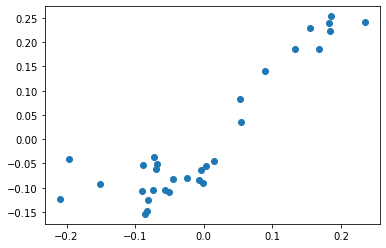

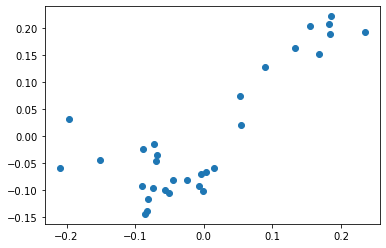

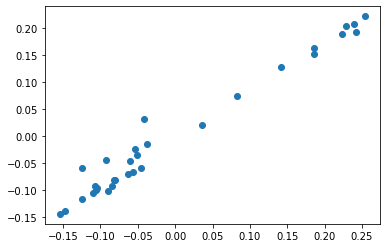

In [243]:
import matplotlib.pyplot as plt
plt.scatter(data_meaned.loc[:,0],data_meaned.loc[:,1])
plt.show()

plt.scatter(data_meaned.loc[:,0],data_meaned.loc[:,2])
plt.show()

plt.scatter(data_meaned.loc[:,1],data_meaned.loc[:,2])
plt.show()


In [278]:
covar=np.cov(data_meaned.T)
print(pd.DataFrame(covar))

          0         1         2
0  0.013695  0.014401  0.011382
1  0.014401  0.018636  0.016046
2  0.011382  0.016046  0.014222


In [275]:
np.std(data_meaned.loc[:,1])

0.1342945008764721

In [319]:
eigval,eigvec=np.linalg.eigh(covar)
print(eigval,"\n",eigvec)
sum(eigval[0:2])/sum(eigval)

[1.62087857e-06 2.75237102e-03 4.37991921e-02] 
 [[ 0.25002702 -0.81652494 -0.52035902]
 [-0.73547119  0.18937919 -0.6505518 ]
 [ 0.62973694  0.5453646  -0.55318066]]


0.05915797076006475

In [299]:
v1=eigvec[0]
v2=eigvec[1]
print(eigvec[:,0:3].T)
data_meaned.T

[[ 0.52035902  0.6505518   0.55318066]
 [ 0.81652494 -0.18937919 -0.5453646 ]
 [ 0.25002702 -0.73547119  0.62973694]]


DATE,2021-12-02,2021-12-03,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-13,2021-12-14,2021-12-15,...,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14
0,-0.195694,-0.209294,-0.151294,-0.089194,-0.072394,-0.067594,-0.069194,-0.089994,-0.073994,-0.044194,...,0.054706,0.053106,0.089506,0.132506,0.154306,0.185506,0.182506,0.184506,0.168406,0.234406
1,-0.041216,-0.124116,-0.092916,-0.053816,-0.037616,-0.051616,-0.061016,-0.107216,-0.104516,-0.082516,...,0.036184,0.082284,0.141484,0.185284,0.229184,0.253384,0.238684,0.222684,0.185584,0.241584
2,0.030406,-0.059294,-0.045694,-0.025294,-0.015094,-0.034994,-0.046294,-0.092594,-0.095994,-0.082294,...,0.020906,0.074206,0.128306,0.162106,0.203406,0.221606,0.206506,0.187806,0.152106,0.191806


[[-1.11823870e-01 -2.22451802e-01 -1.64450505e-01 -9.54147492e-02
  -7.04913357e-02 -8.81096327e-02 -1.01308336e-01 -1.67799561e-01
  -1.59598141e-01 -1.22200727e-01 -1.88076559e-01 -2.16500782e-01
  -2.24922888e-01 -1.56918766e-01 -1.53329244e-01 -1.10140910e-01
  -1.09962719e-01 -1.15836269e-01 -5.43643276e-02 -7.15851119e-02
  -8.21211067e-02  6.35715229e-02  1.22213916e-01  2.09594724e-01
   2.79161837e-01  3.41911249e-01  3.83957692e-01  3.64480476e-01
   3.44767887e-01  2.92506085e-01  3.85241954e-01]
 [-1.68565788e-01 -1.15051788e-01 -8.10189305e-02 -4.88428959e-02
  -4.37559387e-02 -2.63325548e-02 -1.96962103e-02 -2.68022957e-03
   1.17270853e-02  2.44216913e-02  2.09648899e-02  3.66055661e-02
   3.79795629e-02  3.72267415e-02  2.91141080e-02  3.91892305e-02
   6.13100726e-02  7.15708610e-02  5.27546267e-02  4.93430198e-02
   4.69962961e-02  2.64150713e-02 -1.26896824e-02 -2.36836475e-02
  -1.53012070e-02 -2.83382677e-02 -1.73713017e-02 -8.80199702e-03
   6.05943790e-03  1.9408

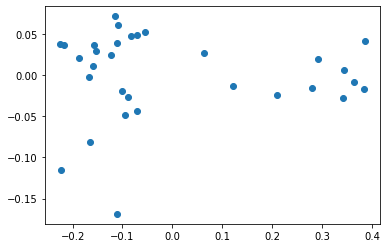

In [303]:
res=np.dot(eigvec.T,data_meaned.T)
print(res)
plt.scatter(res[0],res[1])

In [316]:
from sklearn.decomposition import PCA
model = PCA()
pca_features = model.fit(data)
pca_features.components_[0:2]

res=pca_features.components_.dot(data_meaned.T).T
pd.DataFrame(res).head()


,0,1,2
0,-0.111824,0.168566,-0.000533
1,-0.222452,0.115052,-0.001615
2,-0.164451,0.081019,-0.001735
3,-0.095415,0.048843,-0.001351
4,-0.070491,0.043756,-0.000060


In [310]:
pd.DataFrame(data_meaned).head()

,0,1,2
DATE,,,
2021-12-02,-0.195694,-0.041216,0.030406
2021-12-03,-0.209294,-0.124116,-0.059294
2021-12-06,-0.151294,-0.092916,-0.045694
2021-12-07,-0.089194,-0.053816,-0.025294
2021-12-08,-0.072394,-0.037616,-0.015094
